In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
 

[Reddit Post](https://www.reddit.com/r/Infographics/comments/vunkv3/gun_deaths_per_5m_people_compared_to_ownership/)

[Death Data](https://vizhub.healthdata.org/gbd-results/#state=eyJpZCI6IjZiMWE0YzBjLTM0NDYtNDk0Ny1hNjcyLTg4YjM4OGUwZjg3NiIsIm1ldGEiOnsiaW50ZXJhY3Rpb25UeXBlIjoicmVkaXJlY3QifX0%3d&client_info=eyJ1aWQiOiJiYTRjMWQ4Mi0zMGE1LTQxNzItOTM3ZC0xYjI3NDYzODdhOWMtYjJjXzFhX3NpZ251cF9zaWduaW4iLCJ1dGlkIjoiYTA3NjU1ZjYtZTQ4Mi00MmYzLThiMzAtNmI3ZDAwOWY4MTNkIn0&code=eyJraWQiOiJiS2szUnJCSkxKczBiT2VoeTdHT1VZaGlBYWhVMHlXb01pNU1aUkRmLUU4IiwidmVyIjoiMS4wIiwiemlwIjoiRGVmbGF0ZSIsInNlciI6IjEuMCJ9.FipGmT_mq8vKu19kkoCb0FUhV5vXfjfkyhhPkgu9uhP7-5uqhAhGA1hZ5TQ6uex5rg-VMYse_mTqksHijQezZU7YErZIpqMxAESzzj3oM4NQSGra8N_XnsjT5nUCAu35G_RSX9UnJUw-tv6fM-VDkKvJsta6hqIWTNWeLurCiTiz1kntndP3fplJxBWcZN1y3iED6ifEfdvcrUl-Ly4yU5oDFOu5_UJkvwduT_h2zIHxTV_cfUj4PSS1PVshhpUilwTT3tMK2JN4-OcpoRvqdyEaFRx1UKW5NfMdES_aHvix1h8pA7ovpLaFj8yhJfoz4fGNHY7CtKUiMEwH7Hy1tQ.fHog58lBU-8B21Vt.Y5pb5G6d0Wc-H7evNL5QN5cJWJ9nmpy37lZfLlVnbiIdjBx7qJ4DW5W1RlbKeoV_NDqHmqqCIDjTXF11P_OO0CJCfaDQ42mWpu5S25R6SVFS3A1z6dh_N5XuELQdPXIKT2CuIcTWjpnyur_wZqvoLga31yfhbuuTBXgQvwv8sYJGLfiu5B45HBht1_9VdyUf_-PosrUh4TT7jYmSqPirf7YoPSqsuzj3PtbvNX3iirSeU--GoSqicpvwHUvIDhTyu3kuza5eEkkPg58H8Ujz4rmR5aOafrFrrbnU23y-tPeb13Zd4l_anSzbmvso2llg5OzIFWfSoVjw5CTHEV2zNCDD4nYAT6VSV5mVuWbK8XhieEHRTESsNcviwuTdQC4Ww5TKR3R7mcEN8SQCnoSAfdgDjGR4BZrziDZUGy4bjIvjwRyI-Lm_yG6yXiJw2KWeXFpjebnVwZ1zJJ2EE1348xJCf3Z5iLEYaqI8RNWhA92gR2rlku1an7DtB6FeTy7ZpovCMVaLPlsB4Gws4IOA9apRfgU576SizXRhwkkG1RxdfvkQalVtW9KoH9YFx7C3U3BD6gGQVIXAm5F7xXZJD9USu6wsan1orfl6zf_lwraNHKWLnSa7-1yDzY4qgQJENezmWBpg2OewpYEu4_PrCbJj36ZcSzUsQi7XfRZL2h5PrhwTVZl5yrWp28hncshIBS7w0yjbwyOuMizEWZ4MS2R7PKd6hBCuCeVghc8rjIsydsji44baFwbO3-5HgMZjInzbE1G3wFQieor3SKY576p8d9mDai843mGdp4x2JoJVCwQO2XXwcpm1yPxabYYR8-ksL3dz0doAX52JTuBnaRLyivUaZyAGwyRJboo4k3__puixicEOL0Ffnsxggq8gyyapjDI-YF5O6pYO8TncahLQuJlxoHIWB5Wgh75O9phE9G2dr1It4DUHtpHND0a_Xv054noH5O8ItHv0Jj420vv-8FQo2E1-UvaaRmFdb8KJcgRAQiJ6w-Xu0LF8mQ.c5pBWJChG5fg3S-zfIrxlQ)

Some critics said that this lumped in suicides and accidentals. this dataset, still need to confirm, looks at interpersonal conflict > desth by firearm. 

[Small Arms Survey](https://www.smallarmssurvey.org/sites/default/files/resources/SAS-BP-Civilian-Firearms-Numbers.pdf)

[IQ and Income](https://www.worlddata.info/iq-by-country.php)

[Human Development Index](https://worldpopulationreview.com/country-rankings/developed-countries)


In [7]:
# Cleaning and filtering
sas = pd.read_excel("/content/drive/MyDrive/Public/firearm_data/small_arms_survey.xlsx", header=1)
sas = sas.drop([0])

#Small Arms Survey
sas.rename(columns=lambda s:s.replace("*",""), inplace=True)
sas.rename(columns=lambda s:s.replace(" ","_"), inplace=True)
sas.rename(columns=lambda s:s.lower(), inplace=True)
sas.rename(columns={'countries_and_territories':'location'}, inplace=True)
sas['location'][sas['location'] == 'United States of America'] = 'United States'
# sas.write_csv('SAS')

#Gun Deaths Dataset
death = pd.read_csv('/content/drive/MyDrive/Public/firearm_data/firearm_deaths.csv')
death.rename(columns={'val':'n_deaths', 'upper':'n_deaths_upper', 'lower':'n_deaths_lower'}, inplace=True)
death = death[death['cause'] == 'Physical violence by firearm']
death['location'][death['location'] == 'United States of America'] = 'United States'

#IQ and Income (1990 to 2010)
inq = pd.read_excel("/content/drive/MyDrive/Public/firearm_data/2010_IQ_income.xlsx")

#Human Development Index
hdi = pd.read_csv('/content/drive/MyDrive/Public/firearm_data/hdi_data.csv')

#Merge and tidy
sas = pd.merge(sas, death, on='location')
sas = pd.merge(sas, inq, on='location')
sas = pd.merge(sas, hdi, on='location')
sas.rename(columns=lambda s:s.replace("estimate_of_",""), inplace=True)
sas['location'][sas['location'] == 'United Arab Emirates'] = 'UAE'

# New variables
sas['gun_death_per100'] = (sas['n_deaths'].astype(int) / sas['population_2017']) * 100
sas['gun_deaths_sq'] = sas['gun_death_per100'] ** (1/2)
sas['guns_owned_sq'] = sas['civilian_held_firearms_per_100_persons'] ** (1/2)

FileNotFoundError: ignored

In [ ]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [ ]:
sas

## Human Development Index

* High values indicate more developed nations
* Countries with > 0.8 are considered "developed"

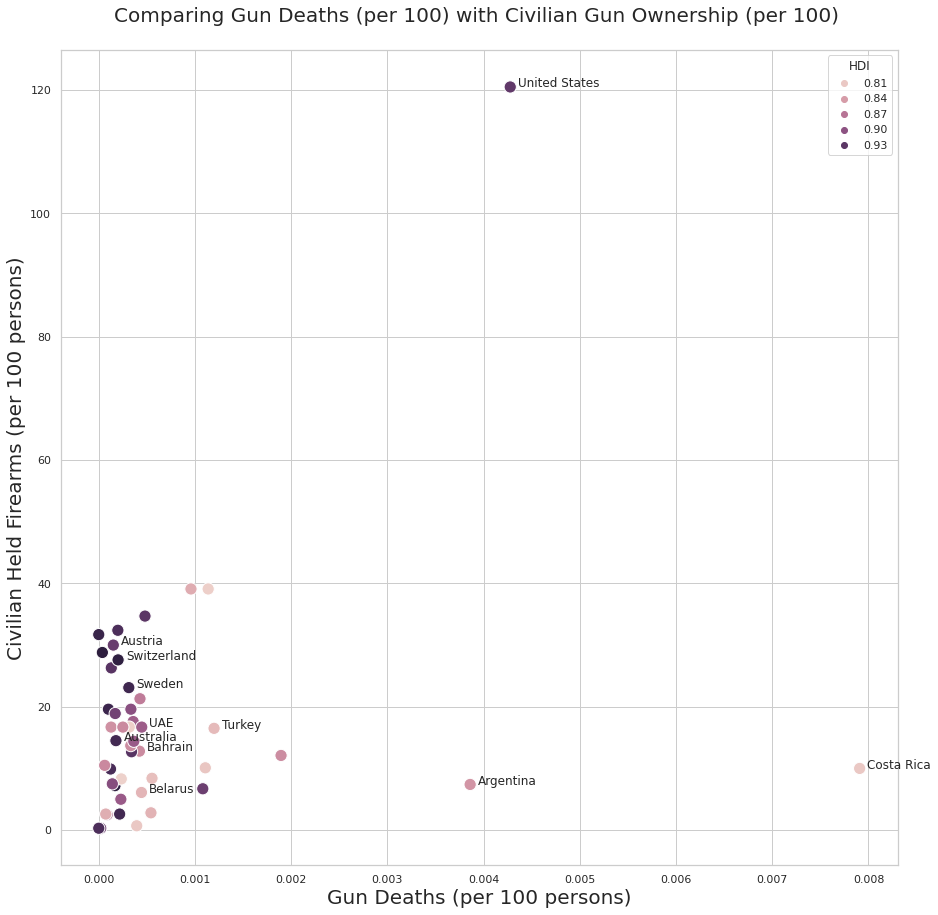

In [ ]:
plt.figure(figsize=(15,15))
data = sas[sas['hdi2019'] > 0.8].reset_index()
labels = data.head().append(data.tail()).location
labels = labels.append(data[data['gun_death_per100'] > 0.006].location)

x = 'gun_death_per100'
y = 'civilian_held_firearms_per_100_persons'

ax = sns.scatterplot(data=data,
                     x=x,
                     y=y,
                     hue=data['hdi2019'],
                     s=150)

ax.set_title("Comparing Gun Deaths (per 100) with Civilian Gun Ownership (per 100) \n", fontsize = 20)
ax.set_xlabel("Gun Deaths (per 100 persons)", fontsize = 20)
ax.set_ylabel("Civilian Held Firearms (per 100 persons)", fontsize = 20)
ax.legend_.set_title("HDI")


inc = 0.00008
for label in labels:
    x_axis = data[data['location'] == label][x].iloc[0] + inc
    y_axis = data[data['location'] == label][y].iloc[0] + inc
    ax.annotate(label, (x_axis, y_axis))


